In [8]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from semopy import Model
import matplotlib.pyplot as plt
import itertools
import seaborn as sns

# Datei einlesen (Pfad anpassen, wenn nötig)
df = pd.read_excel(r"/Users/umerhanif/Desktop/datenmenge4,0.xlsx")

# Ersten Blick auf die Daten
df.head()



,Identifier (RIC),Company Name,"EBIT - Actual\n(FY0, USD)","EBITDA - Actual\n(FY0, USD)",Return On Capital Employed - Actual\n(FY0),"Total Assets - Actual\n(FY0, USD)","Net Debt - Actual\n(FY0, USD)",Cash Ratio\n(FY0),"Shareholders Equity - Actual\n(FY0, USD)",Current Ratio\n(FY0),Return On Equity - Actual\n(FY0),Revenue (LTM),Price to Book,Asset Turnover\n(FY0),P/E (LTM) - IBES Actual,P/Sales (NTM),Payables Turnover\n(FY0)
0,ADBE.OQ,Adobe Inc,10019000000,10542000000,0.50829,30230000000,-2258000000,0.72360,14105000000,1.06758,0.54080,22037000000,13.152646,0.716726,20.817035,6.866519,7.487407
1,GOOGL.OQ,Alphabet Inc,112390000000,150486000000,0.31120,450256000000,-84774000000,0.26330,325084000000,1.83693,0.32909,359713000000,5.578527,0.821014,18.797153,4.783195,18.902584
2,AMZN.TO,Amazon.com Inc,68593000000,144162000000,0.15400,624894000000,-48579000000,0.56000,285970000000,1.05000,0.24289,694994349380,7.239409,1.020000,2.868081,3.068746,3.350000
3,AAPL.TO,Apple Inc,123216000000,134661000000,0.65340,364980000000,42354000000,0.37000,56950000000,0.82000,1.74620,400366000000,47.144413,1.070000,3.083281,7.450270,3.050000
4,ASAN.N,Asana Inc,-40787000,-23244000,-0.34299,891415000,-422294000,0.44425,227523000,1.44472,-0.10679,723876000,18.373262,0.781144,-138.076923,5.234338,9.173807


Fehhlende Werte Überprüfen (NaN)

In [9]:
df.isna().mean().sort_values(ascending=False)

Identifier (RIC)                              0.0
Current Ratio\n(FY0)                          0.0
P/Sales (NTM)                                 0.0
P/E (LTM) - IBES Actual                       0.0
Asset Turnover\n(FY0)                         0.0
Price to Book                                 0.0
Revenue (LTM)                                 0.0
Return On Equity - Actual\n(FY0)              0.0
Shareholders Equity - Actual\n(FY0, USD)      0.0
Company Name                                  0.0
Cash Ratio\n(FY0)                             0.0
Net Debt - Actual\n(FY0, USD)                 0.0
Total Assets - Actual\n(FY0, USD)             0.0
Return On Capital Employed - Actual\n(FY0)    0.0
EBITDA - Actual\n(FY0, USD)                   0.0
EBIT - Actual\n(FY0, USD)                     0.0
Payables Turnover\n(FY0)                      0.0
dtype: float64

Spaltennamen vereinfachen und normieren

In [10]:
df.rename(columns={
    'EBIT - Actual\n(FY0, USD)': 'EBIT',
    'EBITDA - Actual\n(FY0, USD)': 'EBITDA',
    'Return On Capital Employed - Actual\n(FY0)': 'ROCE',
    'Total Assets - Actual\n(FY0, USD)': 'TotalAssets',
    'Net Debt - Actual\n(FY0, USD)': 'NetDebt',
    'Cash Ratio\n(FY0)': 'CashRatio',
    'Shareholders Equity - Actual\n(FY0, USD)': 'Equity',
    'Current Ratio\n(FY0)': 'CurrentRatio',
    'Return On Equity - Actual\n(FY0)': 'ROE',
    'Revenue – Mean\n(FY1, USD)': 'Revenue',

    # Neue Kennzahlen
    'Price to Book': 'PriceToBook',
    'Asset Turnover\n(FY0)': 'AssetTurnover',
    'P/E (LTM) - IBES Actual': 'P/E',
    'P/Sales (NTM)': 'P/Sales',
    'Payables Turnover\n(FY0)': 'PayablesTurnover'
}, inplace=True)


Entfernen irrelevanter Spalten

In [11]:
df_clean = df.drop(columns=["Identifier (RIC)"])
df_clean.head()

,Company Name,EBIT,EBITDA,ROCE,TotalAssets,NetDebt,CashRatio,Equity,CurrentRatio,ROE,Revenue (LTM),PriceToBook,AssetTurnover,P/E,P/Sales,PayablesTurnover
0,Adobe Inc,10019000000,10542000000,0.50829,30230000000,-2258000000,0.72360,14105000000,1.06758,0.54080,22037000000,13.152646,0.716726,20.817035,6.866519,7.487407
1,Alphabet Inc,112390000000,150486000000,0.31120,450256000000,-84774000000,0.26330,325084000000,1.83693,0.32909,359713000000,5.578527,0.821014,18.797153,4.783195,18.902584
2,Amazon.com Inc,68593000000,144162000000,0.15400,624894000000,-48579000000,0.56000,285970000000,1.05000,0.24289,694994349380,7.239409,1.020000,2.868081,3.068746,3.350000
3,Apple Inc,123216000000,134661000000,0.65340,364980000000,42354000000,0.37000,56950000000,0.82000,1.74620,400366000000,47.144413,1.070000,3.083281,7.450270,3.050000
4,Asana Inc,-40787000,-23244000,-0.34299,891415000,-422294000,0.44425,227523000,1.44472,-0.10679,723876000,18.373262,0.781144,-138.076923,5.234338,9.173807


Berechnung wirtschaftlicher Kennzahlen & Auswahl finaler Variablen

In [12]:
# 1. EBIT-Marge
df_clean["EBIT_Marge"] = df_clean["EBIT"] / df_clean["Revenue (LTM)"]

# 2. EBITDA-Marge
df_clean["EBITDA_Marge"] = df_clean["EBITDA"] / df_clean["Revenue (LTM)"]

# 3. NetDebt / EBITDA
df_clean["NetDebt_EBITDA"] = df_clean["NetDebt"] / df_clean["EBITDA"]

# 4. Eigenkapitalquote
df_clean["Eigenkapitalquote"] = df_clean["Equity"] / df_clean["TotalAssets"]


final_columns = [
    "Company Name",
    "ROE",
    "EBIT_Marge",
    "EBITDA_Marge",
    "ROCE",
    "Eigenkapitalquote",
    "NetDebt_EBITDA",
    "CashRatio",
    "CurrentRatio",
    "PriceToBook",
    "AssetTurnover",
    "P/E",
    "P/Sales",
    "PayablesTurnover"
    
]

df_final = df_clean[final_columns].copy()


Kontrolle der vorbereiteten Analysevariablen

In [13]:
df_final.head()

,Company Name,ROE,EBIT_Marge,EBITDA_Marge,ROCE,Eigenkapitalquote,NetDebt_EBITDA,CashRatio,CurrentRatio,PriceToBook,AssetTurnover,P/E,P/Sales,PayablesTurnover
0,Adobe Inc,0.54080,0.454644,0.478377,0.50829,0.466589,-0.214191,0.72360,1.06758,13.152646,0.716726,20.817035,6.866519,7.487407
1,Alphabet Inc,0.32909,0.312444,0.418350,0.31120,0.721998,-0.563335,0.26330,1.83693,5.578527,0.821014,18.797153,4.783195,18.902584
2,Amazon.com Inc,0.24289,0.098696,0.207429,0.15400,0.457630,-0.336975,0.56000,1.05000,7.239409,1.020000,2.868081,3.068746,3.350000
3,Apple Inc,1.74620,0.307758,0.336345,0.65340,0.156036,0.314523,0.37000,0.82000,47.144413,1.070000,3.083281,7.450270,3.050000
4,Asana Inc,-0.10679,-0.056345,-0.032110,-0.34299,0.255238,18.167871,0.44425,1.44472,18.373262,0.781144,-138.076923,5.234338,9.173807


Standardisierung der Analysevariablen

In [14]:
# Neue Datenbasis ohne die vier schwachen Variablen
X_reduced = df_final.drop(columns=[
    "Company Name"
])

# Standardisieren
scaler = StandardScaler()
X_std_reduced = scaler.fit_transform(X_reduced)

# In DataFrame umwandeln
X_std_reduced = pd.DataFrame(X_std_reduced, columns=X_reduced.columns)

# Anzeigen
X_std_reduced.head()

,ROE,EBIT_Marge,EBITDA_Marge,ROCE,Eigenkapitalquote,NetDebt_EBITDA,CashRatio,CurrentRatio,PriceToBook,AssetTurnover,P/E,P/Sales,PayablesTurnover
0,0.151467,1.334367,1.191205,1.231101,0.124396,-0.044028,0.051069,-0.689557,-0.169619,0.482478,-0.372570,-0.272139,-0.529411
1,-0.127380,0.417259,0.820490,0.432940,1.098478,-0.072997,-0.735602,-0.072904,-0.588274,0.946448,-0.397706,-0.499664,-0.103167
2,-0.240915,-0.961283,-0.482117,-0.203677,0.090225,-0.054216,-0.228530,-0.703648,-0.496470,1.831721,-0.595928,-0.686903,-0.683903
3,1.739118,0.387043,0.314041,1.818757,-1.059998,-0.000160,-0.553247,-0.887998,1.709256,2.054167,-0.593250,-0.208387,-0.695105
4,-0.701485,-1.961202,-1.961465,-2.216351,-0.681659,1.481150,-0.426351,-0.387270,0.118947,0.769068,-2.349851,-0.450394,-0.466441


Spaltennamen für mathematische Verarbeitung bereinigt

In [15]:
X_std_reduced.rename(columns={
    'P/E': 'P_E',
    'P/Sales': 'P_Sales'
}, inplace=True)


KFA-Modellschätzung mit semopy (4-Faktoren-Modell)

In [16]:
# Modellbeschreibung 
model_desc = """
Rentabilitaet =~ ROE + EBIT_Marge + EBITDA_Marge + ROCE
Stabilitaet =~ Eigenkapitalquote + NetDebt_EBITDA + CashRatio + CurrentRatio
Bewertung =~ P_E + P_Sales + PriceToBook
Effizienz =~ AssetTurnover + PayablesTurnover
"""


model = Model(model_desc)
model.fit(X_std_reduced)

estimates = model.inspect()
print("🧩 Faktorladungen:")
print(estimates[estimates['op'] == '~'])

factorscores = model.predict(X_std_reduced)
factorscores.head()



🧩 Faktorladungen:
                 lval op           rval  Estimate  Std. Err   z-value  \
0                 ROE  ~  Rentabilitaet  1.000000         -         -   
1          EBIT_Marge  ~  Rentabilitaet  3.022288  1.289129  2.344442   
2        EBITDA_Marge  ~  Rentabilitaet  2.930756  1.250638  2.343408   
3                ROCE  ~  Rentabilitaet  2.117033  0.955602  2.215392   
4   Eigenkapitalquote  ~    Stabilitaet  1.000000         -         -   
5      NetDebt_EBITDA  ~    Stabilitaet -0.227630  0.271799 -0.837494   
6           CashRatio  ~    Stabilitaet  0.962515  0.313611  3.069141   
7        CurrentRatio  ~    Stabilitaet  1.805264  0.541341  3.334798   
8                 P_E  ~      Bewertung  1.000000         -         -   
9             P_Sales  ~      Bewertung  2.086730  0.989525  2.108819   
10        PriceToBook  ~      Bewertung  0.723245  0.352374  2.052494   
11      AssetTurnover  ~      Effizienz  1.000000         -         -   
12   PayablesTurnover  ~      Eff

,AssetTurnover,CashRatio,CurrentRatio,EBITDA_Marge,EBIT_Marge,Eigenkapitalquote,NetDebt_EBITDA,P_E,P_Sales,PayablesTurnover,PriceToBook,ROCE,ROE
0,0.482478,0.051069,-0.689557,1.191205,1.334367,0.124396,-0.044028,-0.372570,-0.272139,-0.529411,-0.169619,1.231101,0.151467
1,0.946448,-0.735602,-0.072904,0.820490,0.417259,1.098478,-0.072997,-0.397706,-0.499664,-0.103167,-0.588274,0.432940,-0.127380
2,1.831721,-0.228530,-0.703648,-0.482117,-0.961283,0.090225,-0.054216,-0.595928,-0.686903,-0.683903,-0.496470,-0.203677,-0.240915
3,2.054167,-0.553247,-0.887998,0.314041,0.387043,-1.059998,-0.000160,-0.593250,-0.208387,-0.695105,1.709256,1.818757,1.739118
4,0.769068,-0.426351,-0.387270,-1.961465,-1.961202,-0.681659,1.481150,-2.349851,-0.450394,-0.466441,0.118947,-2.216351,-0.701485


Bereinigtes KFA-Modell definieren, schätzen und Faktorladungen prüfe

In [17]:
# Modellbeschreibung (bereinigt: ohne NetDebt_EBITDA und PayablesTurnover)
model_desc_clean = """
Rentabilitaet =~ ROE + EBIT_Marge + EBITDA_Marge + ROCE
Stabilitaet =~ Eigenkapitalquote + CashRatio + CurrentRatio
Bewertung =~ P_E + P_Sales + PriceToBook
Effizienz =~ AssetTurnover
"""

# Modell erstellen und fitten
model_clean = Model(model_desc_clean)
model_clean.fit(X_std_reduced)

# Fit-Indizes ausgeben (kompatibel mit älterer semopy-Version)
print("FIT BEREINIGTES MODELL:")
try:
    print(model_clean.fit_statistics)
except:
    print("Keine Fit-Statistiken verfügbar. semopy-Version zu alt?")

# Faktorladungen anzeigen
ladungen_clean = model_clean.inspect()
print("Faktorladungen (bereinigtes Modell):")
print(ladungen_clean[ladungen_clean['op'] == '~'])



FIT BEREINIGTES MODELL:
Keine Fit-Statistiken verfügbar. semopy-Version zu alt?
Faktorladungen (bereinigtes Modell):
                 lval op           rval  Estimate  Std. Err   z-value  \
0                 ROE  ~  Rentabilitaet  1.000000         -         -   
1          EBIT_Marge  ~  Rentabilitaet  3.020399  1.287716  2.345548   
2        EBITDA_Marge  ~  Rentabilitaet  2.929386  1.249778  2.343925   
3                ROCE  ~  Rentabilitaet  2.115808  0.954896  2.215747   
4   Eigenkapitalquote  ~    Stabilitaet  1.000000         -         -   
5           CashRatio  ~    Stabilitaet  0.962240   0.31351  3.069245   
6        CurrentRatio  ~    Stabilitaet  1.804959  0.608625  2.965633   
7                 P_E  ~      Bewertung  1.000000         -         -   
8             P_Sales  ~      Bewertung  2.084968  0.991617  2.102594   
9         PriceToBook  ~      Bewertung  0.723085  0.351917  2.054704   
10      AssetTurnover  ~      Effizienz  1.000000         -         -   

     p

Faktorladungen extrahieren

In [18]:
loadings = model_clean.inspect()
loadings = loadings[loadings['op'] == '~']

#Faktorscores manuell berechnen mit Regressionsformel

Manuelle Berechnung der Faktorscores auf Basis der Ladungen

In [19]:
# Faktor Rentabilität
X_rent = X_std_reduced[['ROE', 'EBIT_Marge', 'EBITDA_Marge', 'ROCE']]
score_rent = X_rent.dot([1.0, 3.004615, 2.913615, 2.104518])  # Ladungen aus deinem Modell

# Faktor Stabilität
X_stab = X_std_reduced[['Eigenkapitalquote', 'CashRatio', 'CurrentRatio']]
score_stab = X_stab.dot([1.0, 0.962871, 1.805256])

# Faktor Bewertung
X_bew = X_std_reduced[['P_E', 'P_Sales', 'PriceToBook']]
score_bew = X_bew.dot([1.0, 2.078401, 0.719029])

# Faktor Effizienz
score_eff = X_std_reduced['AssetTurnover'] * 1.0  # nur eine Variable

# Zusammensetzen der Faktorscores
factorscores_manual = pd.DataFrame({
    'Rentabilitaet': score_rent,
    'Stabilitaet': score_stab,
    'Bewertung': score_bew,
    'Effizienz': score_eff
})

# Vorschau
factorscores_manual.head()


,Rentabilitaet,Stabilitaet,Bewertung,Effizienz
0,10.222314,-1.071257,-1.060146,0.482478
1,4.428044,0.258578,-1.859194,0.946448
2,-4.962546,-1.400084,-2.380563,1.831721
3,7.644633,-3.195768,0.202644,2.054167
4,-16.973447,-1.791302,-3.200423,0.769068


Visualisierung der Faktorscores in 2D-Kombinationen

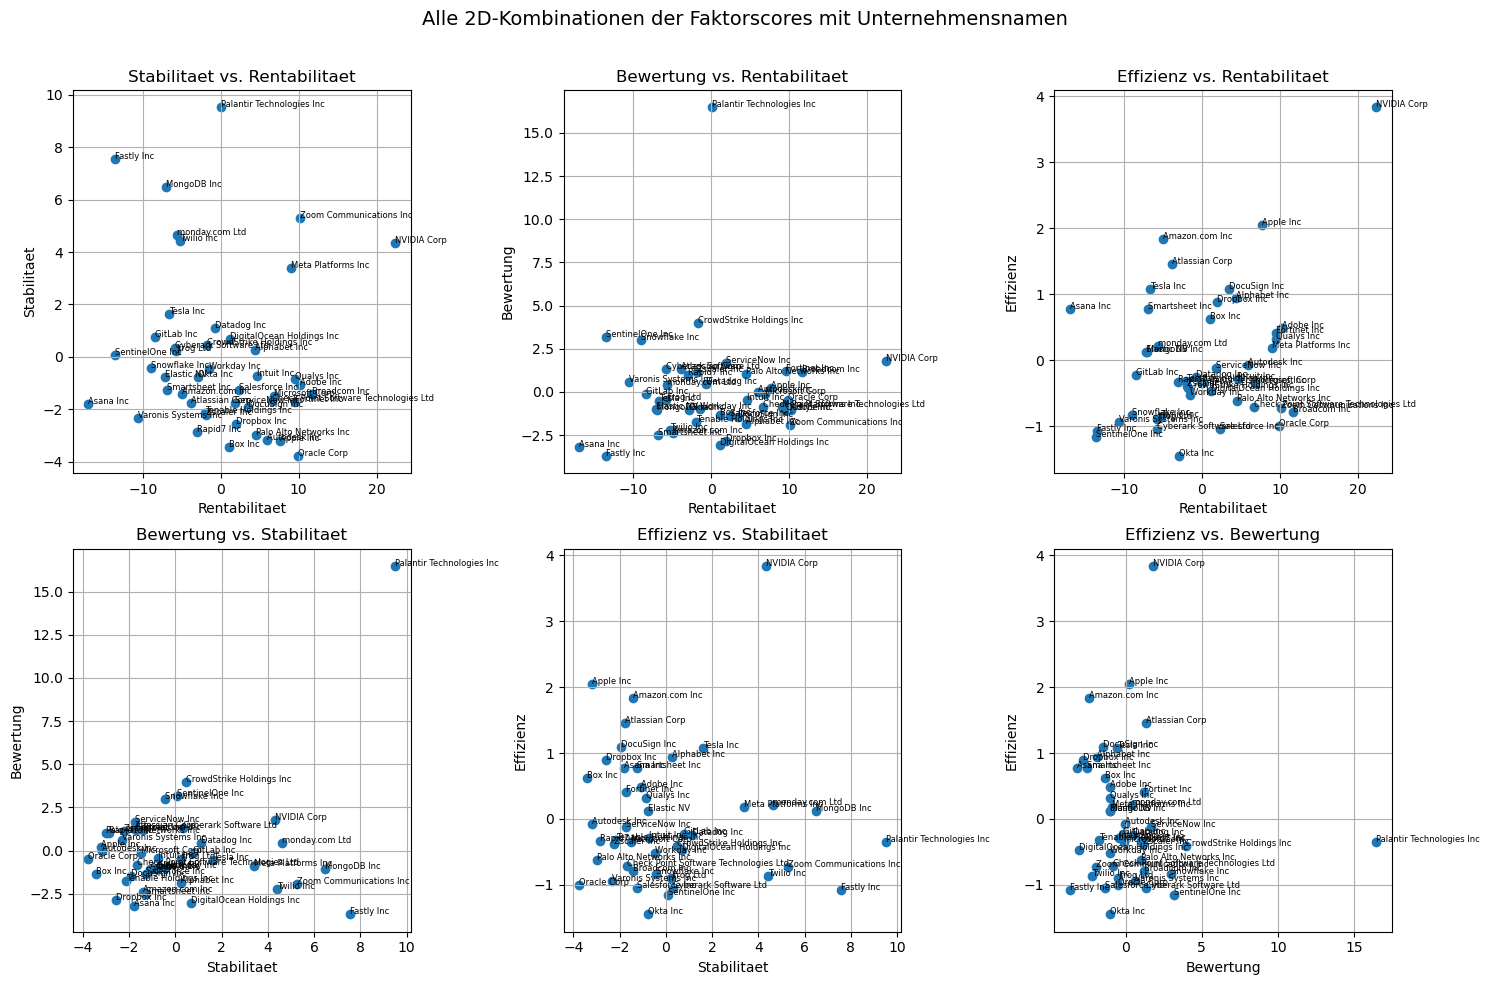

In [20]:
# Alle 2er-Kombinationen der Faktoren
faktoren = ['Rentabilitaet', 'Stabilitaet', 'Bewertung', 'Effizienz']
kombis = list(itertools.combinations(faktoren, 2))

# Grid erstellen (3x2)
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.flatten()

# Für jede Kombination ein Plot mit Punktbeschriftung
for i, (x, y) in enumerate(kombis):
    ax = axs[i]
    ax.scatter(factorscores_manual[x], factorscores_manual[y])

    # Namen annotieren
    for j, name in enumerate(df['Company Name']):  # falls du das ursprüngliche df mit Namen noch hast
        ax.annotate(name, (factorscores_manual[x][j], factorscores_manual[y][j]), fontsize=6)

    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.set_title(f"{y} vs. {x}")
    ax.grid(True)

plt.suptitle("Alle 2D-Kombinationen der Faktorscores mit Unternehmensnamen", fontsize=14)
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()


Faktorscore-Streudiagramme mit Unternehmenslabels

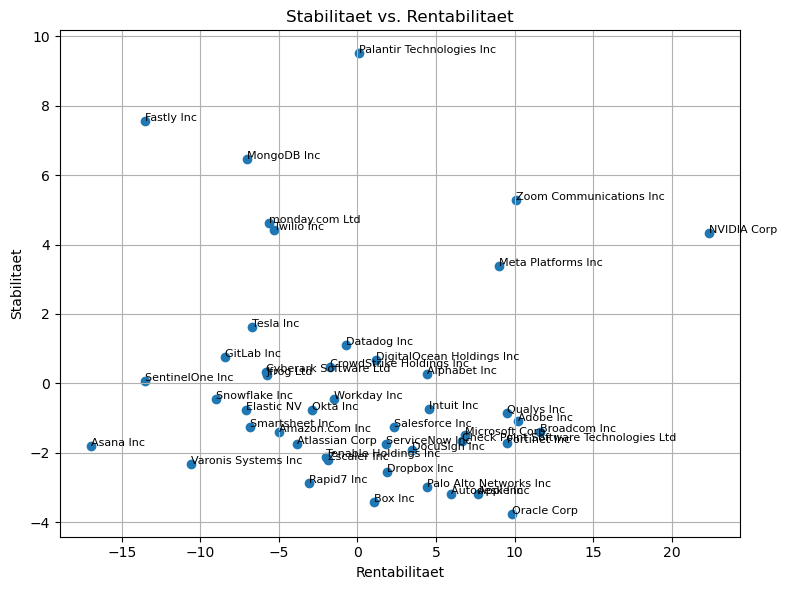

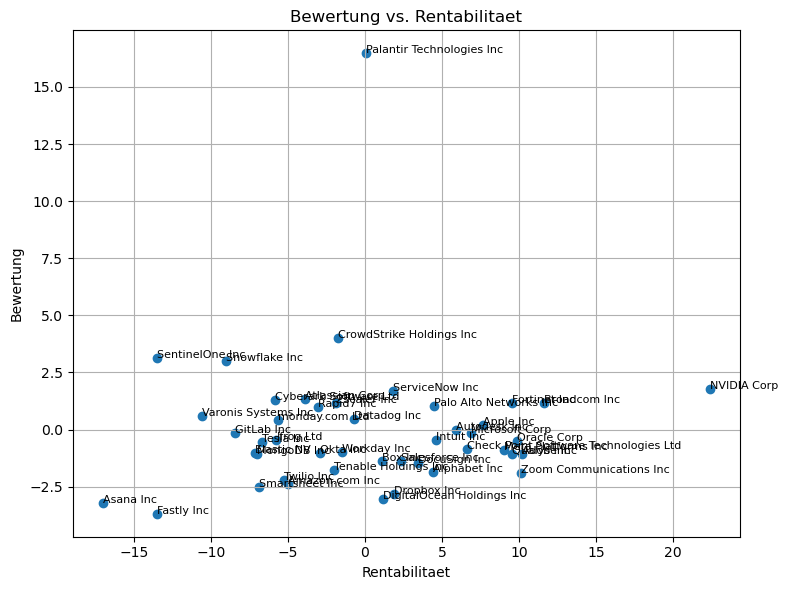

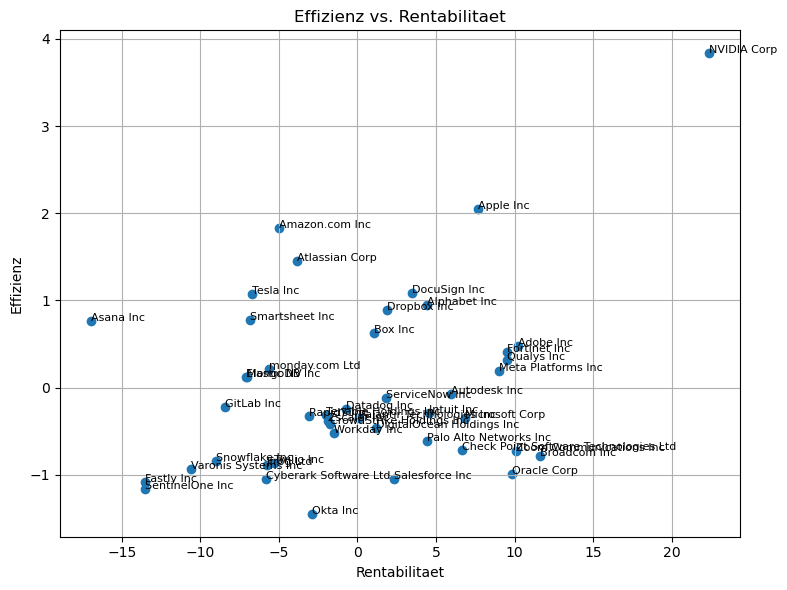

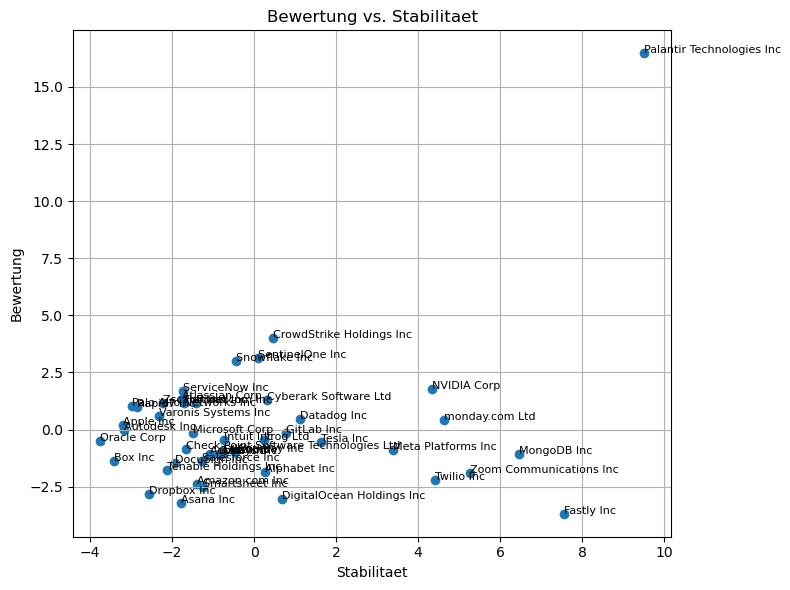

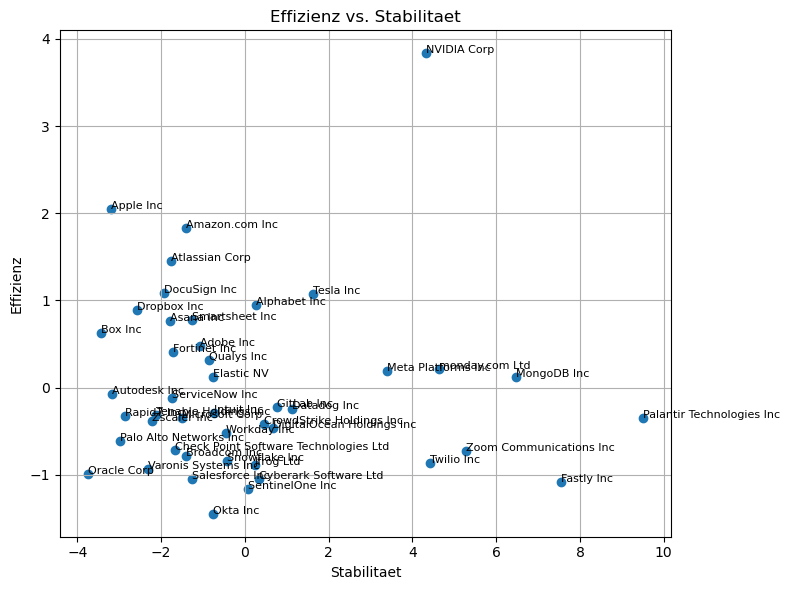

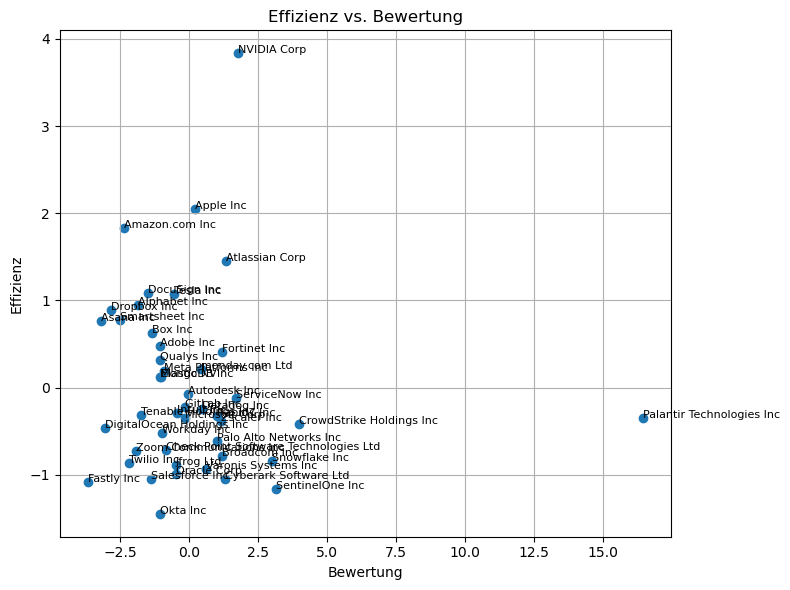

In [21]:
factorscores_manual['Company Name'] = df['Company Name'].values

# Alle 2er-Kombinationen der Faktoren
faktoren = ['Rentabilitaet', 'Stabilitaet', 'Bewertung', 'Effizienz']
kombis = list(itertools.combinations(faktoren, 2))

# Schleife: jede Kombination einzeln plotten
for x, y in kombis:
    plt.figure(figsize=(8, 6))  # größer & leserlich
    plt.scatter(factorscores_manual[x], factorscores_manual[y])
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(f"{y} vs. {x}")
    plt.grid(True)

    # Optional: Unternehmensnamen anzeigen
    for i, name in enumerate(factorscores_manual['Company Name']):
        plt.annotate(name, (factorscores_manual[x][i], factorscores_manual[y][i]), fontsize=8)

    plt.tight_layout()
    plt.show()


In [22]:
from sklearn.cluster import KMeans

# Clusteranzahl
n_clusters = 3

# KMeans auf manuelle Faktoren anwenden
X_cluster_kfa = factorscores_manual[["Rentabilitaet", "Stabilitaet", "Bewertung", "Effizienz"]]
kmeans_kfa = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
factorscores_manual["Cluster"] = kmeans_kfa.fit_predict(X_cluster_kfa)

# Clusterzentren extrahieren (optional)
centroids = pd.DataFrame(kmeans_kfa.cluster_centers_, columns=X_cluster_kfa.columns)
centroids["Cluster"] = centroids.index

# Ergebnis anzeigen
display(factorscores_manual)


,Rentabilitaet,Stabilitaet,Bewertung,Effizienz,Company Name,Cluster
0,10.222314,-1.071257,-1.060146,0.482478,Adobe Inc,1
1,4.428044,0.258578,-1.859194,0.946448,Alphabet Inc,1
2,-4.962546,-1.400084,-2.380563,1.831721,Amazon.com Inc,2
3,7.644633,-3.195768,0.202644,2.054167,Apple Inc,1
4,-16.973447,-1.791302,-3.200423,0.769068,Asana Inc,2
5,-3.860274,-1.752639,1.324769,1.455483,Atlassian Corp,0
6,5.936589,-3.174527,-0.036614,-0.076501,Autodesk Inc,1
7,1.085246,-3.428091,-1.363136,0.628597,Box Inc,0
8,11.649401,-1.408623,1.177390,-0.782129,Broadcom Inc,1
9,6.626957,-1.673101,-0.849619,-0.712907,Check Point Software Technologies Ltd,1


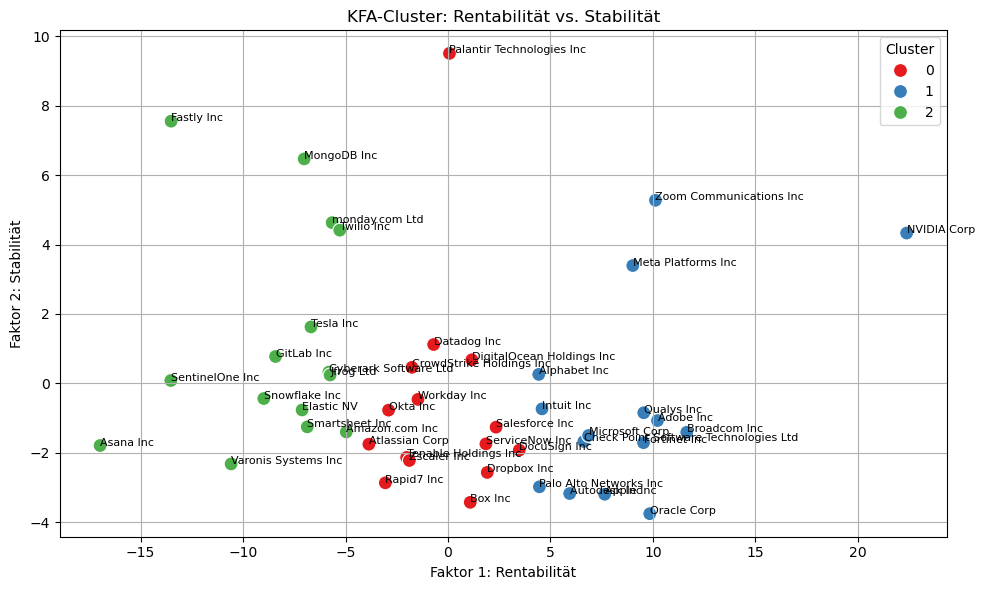

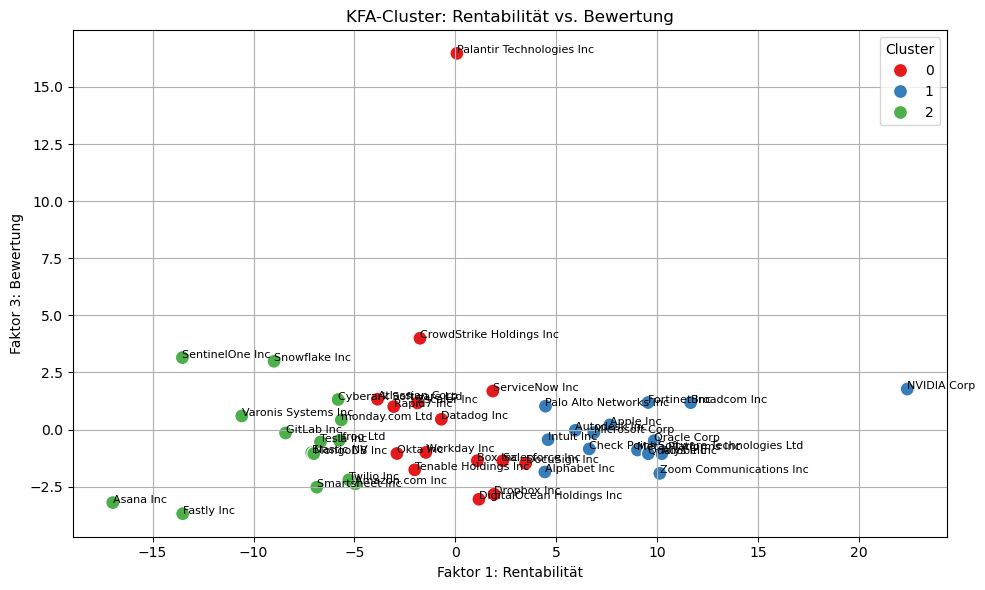

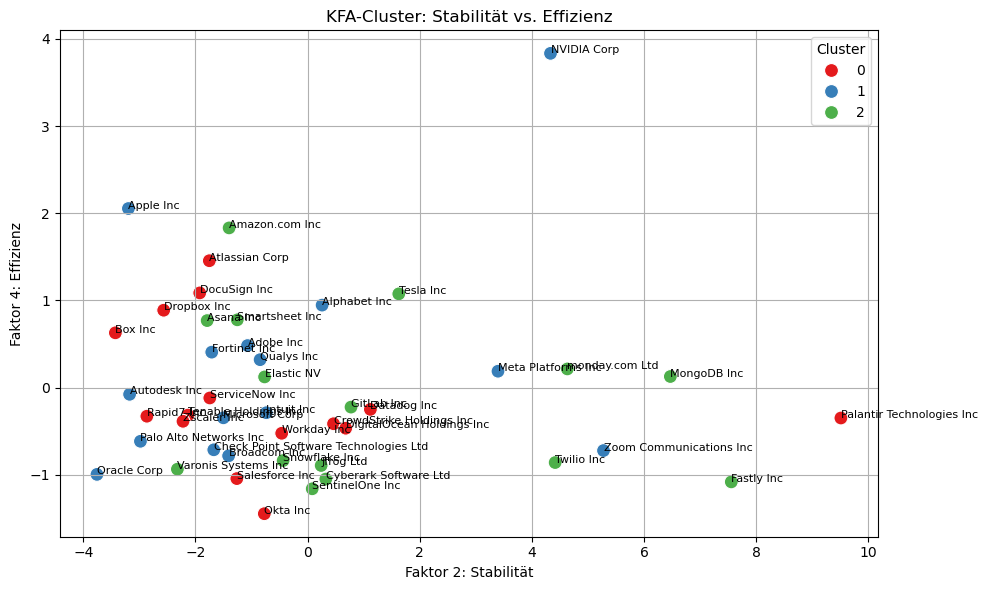

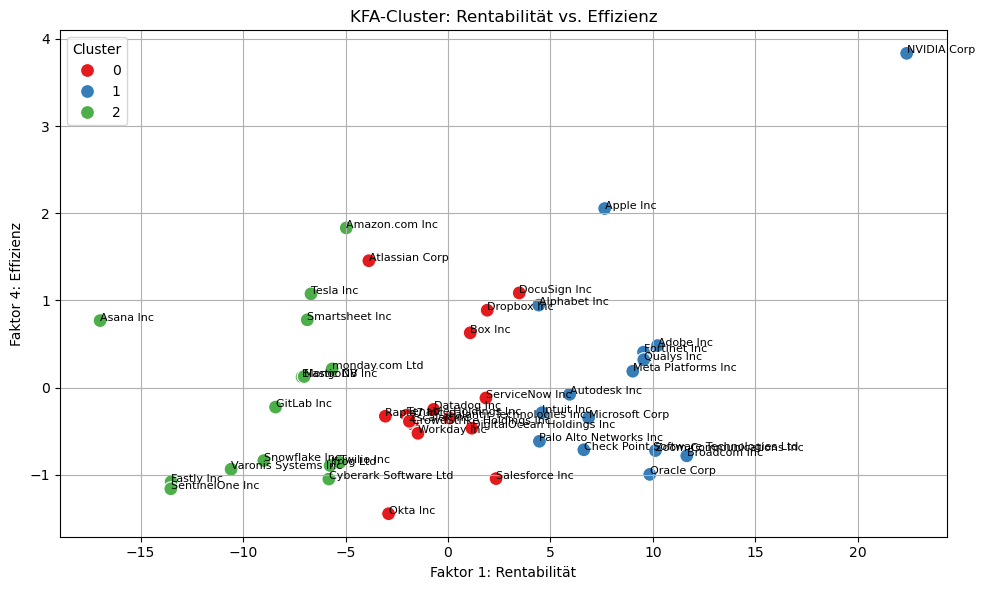

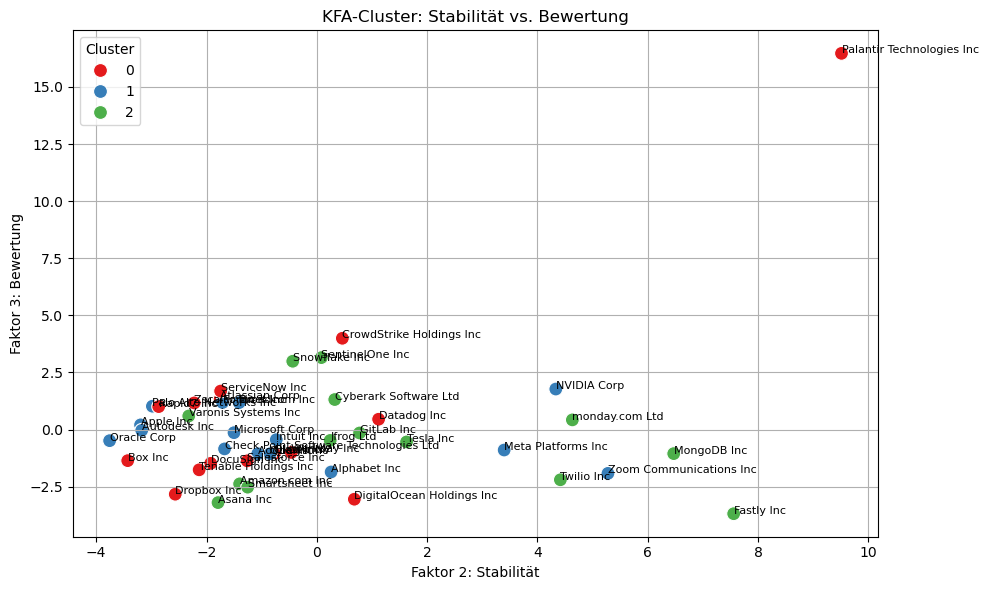

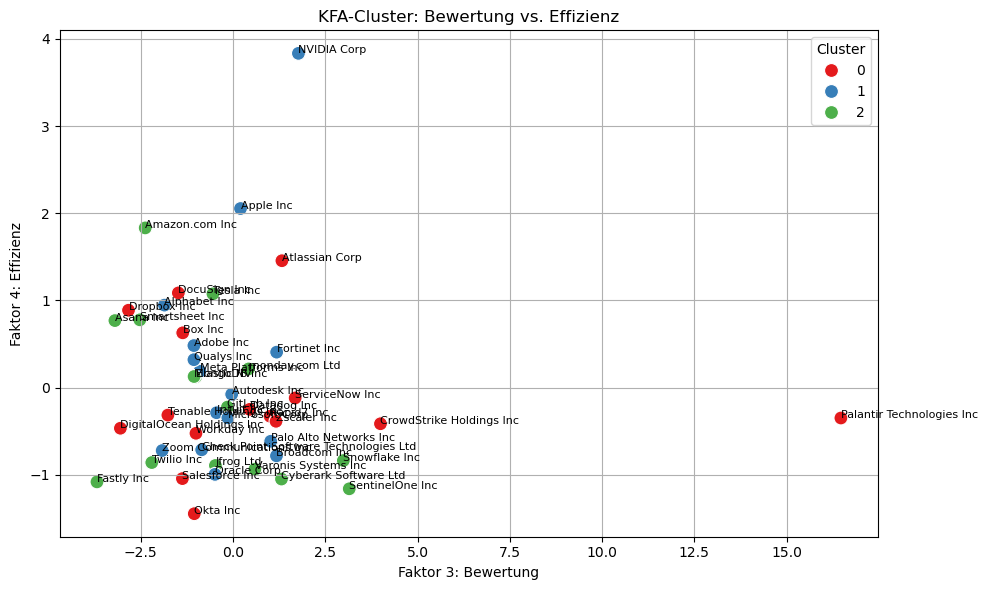

In [23]:
# Plot 1: Rentabilitaet vs. Stabilitaet
plt.figure(figsize=(10, 6))
sns.scatterplot(data=factorscores_manual, x="Rentabilitaet", y="Stabilitaet", hue="Cluster", palette="Set1", s=100)
for i in range(factorscores_manual.shape[0]):
    plt.text(factorscores_manual.loc[i, "Rentabilitaet"], factorscores_manual.loc[i, "Stabilitaet"],
             df.loc[i, "Company Name"], fontsize=8)
plt.title("KFA-Cluster: Rentabilität vs. Stabilität")
plt.xlabel("Faktor 1: Rentabilität")
plt.ylabel("Faktor 2: Stabilität")
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot 2: Rentabilitaet vs. Bewertung
plt.figure(figsize=(10, 6))
sns.scatterplot(data=factorscores_manual, x="Rentabilitaet", y="Bewertung", hue="Cluster", palette="Set1", s=100)
for i in range(factorscores_manual.shape[0]):
    plt.text(factorscores_manual.loc[i, "Rentabilitaet"], factorscores_manual.loc[i, "Bewertung"],
             df.loc[i, "Company Name"], fontsize=8)
plt.title("KFA-Cluster: Rentabilität vs. Bewertung")
plt.xlabel("Faktor 1: Rentabilität")
plt.ylabel("Faktor 3: Bewertung")
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot 3: Stabilitaet vs. Effizienz
plt.figure(figsize=(10, 6))
sns.scatterplot(data=factorscores_manual, x="Stabilitaet", y="Effizienz", hue="Cluster", palette="Set1", s=100)
for i in range(factorscores_manual.shape[0]):
    plt.text(factorscores_manual.loc[i, "Stabilitaet"], factorscores_manual.loc[i, "Effizienz"],
             df.loc[i, "Company Name"], fontsize=8)
plt.title("KFA-Cluster: Stabilität vs. Effizienz")
plt.xlabel("Faktor 2: Stabilität")
plt.ylabel("Faktor 4: Effizienz")
plt.grid(True)
plt.tight_layout()
plt.show()


# Plot 4: Rentabilitaet vs. Effizienz
plt.figure(figsize=(10, 6))
sns.scatterplot(data=factorscores_manual, x="Rentabilitaet", y="Effizienz", hue="Cluster", palette="Set1", s=100)
for i in range(factorscores_manual.shape[0]):
    plt.text(factorscores_manual.loc[i, "Rentabilitaet"], factorscores_manual.loc[i, "Effizienz"],
             df.loc[i, "Company Name"], fontsize=8)
plt.title("KFA-Cluster: Rentabilität vs. Effizienz")
plt.xlabel("Faktor 1: Rentabilität")
plt.ylabel("Faktor 4: Effizienz")
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot 5: Stabilitaet vs. Bewertung
plt.figure(figsize=(10, 6))
sns.scatterplot(data=factorscores_manual, x="Stabilitaet", y="Bewertung", hue="Cluster", palette="Set1", s=100)
for i in range(factorscores_manual.shape[0]):
    plt.text(factorscores_manual.loc[i, "Stabilitaet"], factorscores_manual.loc[i, "Bewertung"],
             df.loc[i, "Company Name"], fontsize=8)
plt.title("KFA-Cluster: Stabilität vs. Bewertung")
plt.xlabel("Faktor 2: Stabilität")
plt.ylabel("Faktor 3: Bewertung")
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot 6: Bewertung vs. Effizienz
plt.figure(figsize=(10, 6))
sns.scatterplot(data=factorscores_manual, x="Bewertung", y="Effizienz", hue="Cluster", palette="Set1", s=100)
for i in range(factorscores_manual.shape[0]):
    plt.text(factorscores_manual.loc[i, "Bewertung"], factorscores_manual.loc[i, "Effizienz"],
             df.loc[i, "Company Name"], fontsize=8)
plt.title("KFA-Cluster: Bewertung vs. Effizienz")
plt.xlabel("Faktor 3: Bewertung")
plt.ylabel("Faktor 4: Effizienz")
plt.grid(True)
plt.tight_layout()
plt.show()
